In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv(r"C:\Users\Z E Y T O N\Desktop\New folder\Q1_cleaned_data.csv")

print(df1.shape)
print(df1.columns.tolist())
print(df1.isnull().sum())
df1.head()

(28022, 28)
['Quantity', 'Profit', 'Shipping_Cost', 'Discount', 'Order_Priority', 'mmonthN', 'Sales', 'Markets', 'Category_Office_Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables', 'Segment_Corporate', 'Segment_Home_Office']
Quantity                    0
Profit                      0
Shipping_Cost               0
Discount                    0
Order_Priority              0
mmonthN                     0
Sales                       0
Markets                     0
Category_Office_Supplies    0
Category_Technology         0
Sub-Category_Appliances     0
Sub-Category_Art            0
Sub-Category_Binders        0
Sub-Category_

,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office_Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home_Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0


In [3]:
target_col = 'Profit'
X = df1.drop(columns=[target_col])
y = df1[target_col]
X.shape

(28022, 27)

In [4]:
from sklearn.model_selection import train_test_split

# first split: train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# second split: validation + test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

Train: (19615, 27) Validation: (4203, 27) Test: (4204, 27)


In [5]:
from sklearn.preprocessing import StandardScaler

# Numeric columns (manual list for clarity)
num_cols = ['Shipping_Cost', 'Discount', 'Sales']

# Standardize numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [6]:
df1.head(10)

,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office_Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home_Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0
5,1,-2.262180,1.011601,0.7,1,12,2.075182,3,1,0,...,0,0,0,0,0,1,0,0,1,0
6,1,-4.331522,2.201659,0.7,0,11,3.772301,3,1,0,...,0,0,0,0,0,1,0,0,0,0
7,1,-1.786914,0.223144,0.7,3,12,1.425275,3,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,-1.587397,0.223144,0.7,3,12,1.488174,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9,8,-4.425852,1.625311,0.7,3,12,4.359985,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from xgboost import XGBRegressor

n_list = [200, 400]
depth_list = [5, 7, 9]
lr_list = [0.05, 0.1]

best = {"name": None, "val_r2": -np.inf, "model": None}

for n in n_list:
    for d in depth_list:
        for lr in lr_list:
            model = XGBRegressor(
                n_estimators=n,
                max_depth=d,
                learning_rate=lr,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1,
                objective="reg:squarederror",
                verbosity=0
            )

            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            y_tr = model.predict(X_train)
            y_va = model.predict(X_val)

            tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
            va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
            tr_r2 = r2_score(y_train, y_tr)
            va_r2 = r2_score(y_val, y_va)

            name = f"n={n}, depth={d}, lr={lr}"
            print(f"{name:25s} :::: Train R²: {tr_r2:.4f} :::: Val R²: {va_r2:.4f} :::: "
                  f"Train RMSE: {tr_rmse:.4f} :::: Val RMSE: {va_rmse:.4f}")

            if va_r2 > best["val_r2"]:
                best = {"name": name, "val_r2": va_r2, "model": model}

print("\nBest on validation:", best["name"], ":::: Val R²:", f"{best['val_r2']:.4f}")

# Top 10 important features
imp = best["model"].feature_importances_
feat_imp = sorted(zip(X_train.columns, imp), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 features:")
for f, v in feat_imp:
    print(f"{f:30s}  {v:.4f}")

n=200, depth=5, lr=0.05   :::: Train R²: 0.7196 :::: Val R²: 0.6732 :::: Train RMSE: 1.5021 :::: Val RMSE: 1.5940
n=200, depth=5, lr=0.1    :::: Train R²: 0.7568 :::: Val R²: 0.6722 :::: Train RMSE: 1.3991 :::: Val RMSE: 1.5965
n=200, depth=7, lr=0.05   :::: Train R²: 0.8027 :::: Val R²: 0.6648 :::: Train RMSE: 1.2600 :::: Val RMSE: 1.6143
n=200, depth=7, lr=0.1    :::: Train R²: 0.8622 :::: Val R²: 0.6556 :::: Train RMSE: 1.0529 :::: Val RMSE: 1.6363
n=200, depth=9, lr=0.05   :::: Train R²: 0.8907 :::: Val R²: 0.6511 :::: Train RMSE: 0.9381 :::: Val RMSE: 1.6470
n=200, depth=9, lr=0.1    :::: Train R²: 0.9474 :::: Val R²: 0.6367 :::: Train RMSE: 0.6505 :::: Val RMSE: 1.6807
n=400, depth=5, lr=0.05   :::: Train R²: 0.7598 :::: Val R²: 0.6692 :::: Train RMSE: 1.3902 :::: Val RMSE: 1.6039
n=400, depth=5, lr=0.1    :::: Train R²: 0.8071 :::: Val R²: 0.6606 :::: Train RMSE: 1.2461 :::: Val RMSE: 1.6245
n=400, depth=7, lr=0.05   :::: Train R²: 0.8644 :::: Val R²: 0.6520 :::: Train RMSE: 1.0

# Evaluation on test:

In [8]:
# XGBoost model on test
final_model = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective="reg:squarederror"
)

# Train on combined train + validation for better learning:

X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])
final_model.fit(X_train_full, y_train_full)

# Evaluate on test set
y_test_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Final Model XGBoost")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Final Model XGBoost
Test RMSE: 1.6138
Test R²: 0.6759


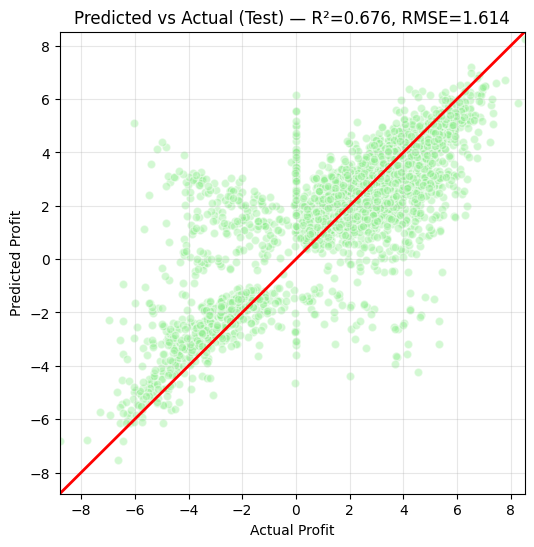

In [9]:
# Metrics for title
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

# Identity line limits
lo = float(min(y_test.min(), y_test_pred.min()))
hi = float(max(y_test.max(), y_test_pred.max()))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, color='lightgreen', alpha=0.4, edgecolor='white')
plt.plot([lo, hi], [lo, hi], color='red', linewidth=2)  # red identity line
plt.xlim(lo, hi)
plt.ylim(lo, hi)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title(f"Predicted vs Actual (Test) — R²={r2:.3f}, RMSE={rmse:.3f}")
plt.grid(True, alpha=0.3)
plt.show()

This plot shows the relationship between the actual profit (x-axis) and the predicted profit from the XGBoost model (y-axis).
Each dot represents one test sample.
The red line is the ideal line (y = x), where predictions perfectly match actual values.
The points are closely clustered around this line, meaning the model performs well.
R² = 0.676 indicates that about 67% of the profit variance is explained by the model, and RMSE = 1.614 shows the average prediction error.
Overall, the model demonstrates solid accuracy with minimal bias or overfitting.

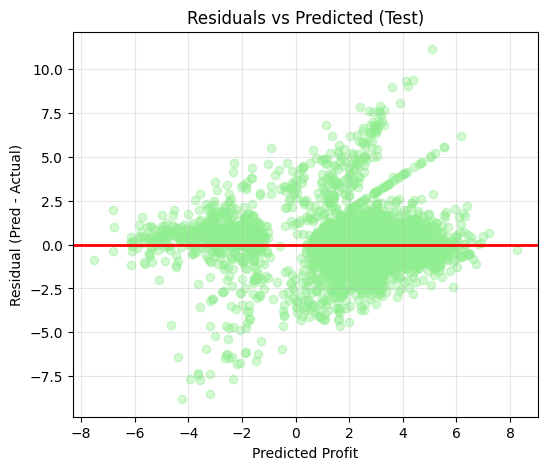

In [10]:
# === Residuals ===
# residual = prediction error
res = y_test_pred - y_test

plt.figure(figsize=(6,5))
plt.scatter(y_test_pred, res, color='lightgreen', alpha=0.4)
plt.axhline(0, linewidth=2, color='red')
plt.xlabel("Predicted Profit")
plt.ylabel("Residual (Pred - Actual)")
plt.title("Residuals vs Predicted (Test)")
plt.grid(True, alpha=0.3)
plt.show()

The residual is the prediction error = (Predicted − Actual).

X-axis: predicted profit.

Y-axis: residual (how far off each prediction is).

The horizontal line at 0 represents perfect predictions.

Since points are scattered randomly around zero, the model has no clear bias — errors are evenly distributed 

A visible pattern (like a curve or funnel shape) would indicate bias or non-linearity, but this looks fine.

A few distant points (outliers) just show larger prediction errors for some cases.

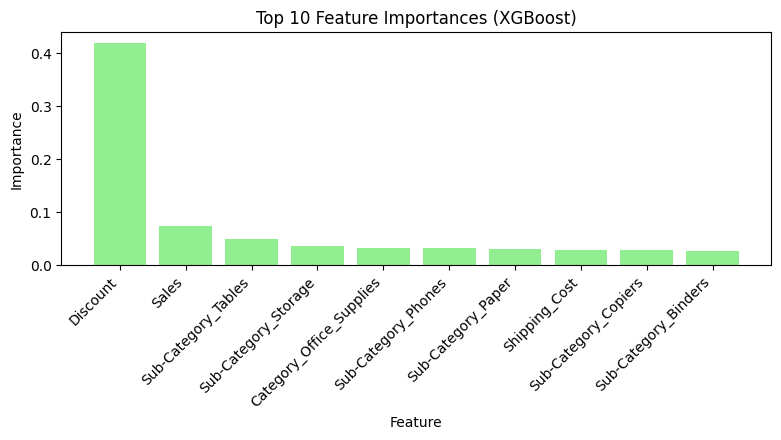

In [11]:
# Feature importance bar plot
feat_imp = sorted(zip(X_train.columns, final_model.feature_importances_),
                  key=lambda x: x[1], reverse=True)[:10]

labels = [f for f, _ in feat_imp]
values = [v for _, v in feat_imp]
x = range(len(values))

plt.figure(figsize=(8, 4.5))
plt.bar(x, values, color='lightgreen')
plt.xticks(x, labels, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

Feature Importance Interpretation (XGBoost)

- The plot shows which features have the strongest influence on predicting profit.  
- Discount dominates by far — meaning pricing and discount strategies are the most critical factors affecting profit.  
- Sales, Shipping_Cost, and certain Sub-Categories (like Tables, Phones, Storage) also contribute, but to a lesser degree.  
- This helps identify which business aspects most impact profitability and where optimization could matter most.  
-  Note: Feature importance shows influence, not causality.  
  - Values are relative and depend on correlations among features.  
  - For deeper interpretability, consider using Permutation Importance or SHAP values to verify and visualize feature effects.

# Final Model:

- Model: XGBoost Regressor (n=200, depth=5, lr=0.05)
- Test RMSE: 1.6138  
- Test R²: 0.6759  
- Performance: Stable and generalizable (very close to validation)
- Main features: Discount, Sales, Shipping_Cost

# Save top 10 features as CSV :

In [12]:
top10_columns = [
    'Discount',
    'Sales',
    'Sub-Category_Tables',
    'Sub-Category_Storage',
    'Category_Office_Supplies',
    'Sub-Category_Phones',
    'Sub-Category_Paper',
    'Shipping_Cost',
    'Sub-Category_Copiers',
    'Sub-Category_Binders'
]

top10_df = df1[top10_columns]
top10_df.to_csv(r"C:\Users\Z E Y T O N\Desktop\Q1_top10_features.csv", index=False)

# Feature Importance Table

In [13]:
xgb_imp = pd.Series(final_model.feature_importances_, index=X_train_full.columns, name='XGBoost Importance (%)') * 100

# Build a DataFrame
imp_tbl = xgb_imp.reset_index().rename(columns={'index': 'Feature'})
imp_tbl = imp_tbl.sort_values('XGBoost Importance (%)', ascending=False)
imp_tbl.insert(0, 'Rank', range(1, len(imp_tbl) + 1))

top10_imp = imp_tbl.head(10)[['Rank', 'Feature', 'XGBoost Importance (%)']]

top10_imp.to_csv(r"C:\Users\Z E Y T O N\Desktop\Q1_xgb_feature_importance.csv", index=False)
print(top10_imp)

    Rank                   Feature  XGBoost Importance (%)
2      1                  Discount               41.827625
5      2                     Sales                7.384191
24     3       Sub-Category_Tables                4.892670
22     4      Sub-Category_Storage                3.627450
7      5  Category_Office_Supplies                3.338112
21     6       Sub-Category_Phones                3.305125
20     7        Sub-Category_Paper                3.102805
1      8             Shipping_Cost                2.949687
14     9      Sub-Category_Copiers                2.915509
11    10      Sub-Category_Binders                2.694877
